In [34]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [35]:
SF_crime_df = pd.read_csv(
    Path("../crime-trends/resources/cleaned.csv")
)
SF_crime_df.head()

,Incident_Datetime,Incident_Date,Incident_Time,Incident_Year,Incident_Day_of_Week,Report_Datetime,Row_ID,Incident_ID,Incident_Number,Report_Type_Code,Report_Type_Description,Incident_Code,Incident_Description,Resolution,Police_District
0,2023/03/13 11:41:00 PM,2023/03/13,23:41,2023,Monday,2023/03/13 11:41:00 PM,125373607041,1253736,230167874,VS,Vehicle Supplement,7041,Vehicle Recovered Auto,Open or Active,Out of SF
1,2023/03/01 05:02:00 AM,2023/03/01,05:02,2023,Wednesday,2023/03/11 03:40:00 PM,125379506374,1253795,236046151,II,Coplogic Initial,6374,Theft Other Property >$950,Open or Active,Mission
2,2023/03/13 01:16:00 PM,2023/03/13,13:16,2023,Monday,2023/03/13 01:17:00 PM,125357107041,1253571,220343896,VS,Vehicle Supplement,7041,Vehicle Recovered Auto,Open or Active,Out of SF
3,2023/03/13 10:59:00 AM,2023/03/13,10:59,2023,Monday,2023/03/13 11:00:00 AM,125355107041,1253551,230174885,VS,Vehicle Supplement,7041,Vehicle Recovered Auto,Open or Active,Out of SF
4,2023/03/14 06:44:00 PM,2023/03/14,18:44,2023,Tuesday,2023/03/14 06:45:00 PM,125402407041,1254024,230176728,VS,Vehicle Supplement,7041,Vehicle Recovered Auto,Open or Active,Out of SF


In [36]:
SF_crime_df = SF_crime_df.rename(columns={'Police_District': 'Districts'})
SF_crime_df

,Incident_Datetime,Incident_Date,Incident_Time,Incident_Year,Incident_Day_of_Week,Report_Datetime,Row_ID,Incident_ID,Incident_Number,Report_Type_Code,Report_Type_Description,Incident_Code,Incident_Description,Resolution,Districts
0,2023/03/13 11:41:00 PM,2023/03/13,23:41,2023,Monday,2023/03/13 11:41:00 PM,125373607041,1253736,230167874,VS,Vehicle Supplement,7041,Vehicle Recovered Auto,Open or Active,Out of SF
1,2023/03/01 05:02:00 AM,2023/03/01,05:02,2023,Wednesday,2023/03/11 03:40:00 PM,125379506374,1253795,236046151,II,Coplogic Initial,6374,Theft Other Property >$950,Open or Active,Mission
2,2023/03/13 01:16:00 PM,2023/03/13,13:16,2023,Monday,2023/03/13 01:17:00 PM,125357107041,1253571,220343896,VS,Vehicle Supplement,7041,Vehicle Recovered Auto,Open or Active,Out of SF
3,2023/03/13 10:59:00 AM,2023/03/13,10:59,2023,Monday,2023/03/13 11:00:00 AM,125355107041,1253551,230174885,VS,Vehicle Supplement,7041,Vehicle Recovered Auto,Open or Active,Out of SF
4,2023/03/14 06:44:00 PM,2023/03/14,18:44,2023,Tuesday,2023/03/14 06:45:00 PM,125402407041,1254024,230176728,VS,Vehicle Supplement,7041,Vehicle Recovered Auto,Open or Active,Out of SF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745681,2023/03/22 01:30:00 PM,2023/03/22,13:30,2023,Wednesday,2023/03/22 01:35:00 PM,125685303401,1256853,230201949,II,Initial,3401,Shoplifting Force against Agent,Cite or Arrest Adult,Mission
745682,2023/03/22 12:13:00 AM,2023/03/22,00:13,2023,Wednesday,2023/03/22 12:13:00 AM,125665206371,1256652,230200838,II,Initial,6371,Theft Other Property <$50,Cite or Arrest Adult,Northern
745683,2023/03/21 09:19:00 PM,2023/03/21,21:19,2023,Tuesday,2023/03/21 10:16:00 PM,125664272000,1256642,230200800,II,Initial,72000,Found Property,Open or Active,Ingleside
745684,2023/03/22 03:28:00 PM,2023/03/22,15:28,2023,Wednesday,2023/03/22 05:51:00 PM,125687306303,1256873,230202486,II,Initial,6303,Theft From Building $200-$950,Open or Active,Central


In [37]:
SF_crime_df = SF_crime_df.drop(["Incident_Datetime","Incident_Date","Incident_Time","Incident_Year","Incident_Day_of_Week","Report_Datetime", "Incident_Description"], axis = 1)

SF_crime_df

,Row_ID,Incident_ID,Incident_Number,Report_Type_Code,Report_Type_Description,Incident_Code,Resolution,Districts
0,125373607041,1253736,230167874,VS,Vehicle Supplement,7041,Open or Active,Out of SF
1,125379506374,1253795,236046151,II,Coplogic Initial,6374,Open or Active,Mission
2,125357107041,1253571,220343896,VS,Vehicle Supplement,7041,Open or Active,Out of SF
3,125355107041,1253551,230174885,VS,Vehicle Supplement,7041,Open or Active,Out of SF
4,125402407041,1254024,230176728,VS,Vehicle Supplement,7041,Open or Active,Out of SF
...,...,...,...,...,...,...,...,...
745681,125685303401,1256853,230201949,II,Initial,3401,Cite or Arrest Adult,Mission
745682,125665206371,1256652,230200838,II,Initial,6371,Cite or Arrest Adult,Northern
745683,125664272000,1256642,230200800,II,Initial,72000,Open or Active,Ingleside
745684,125687306303,1256873,230202486,II,Initial,6303,Open or Active,Central


In [38]:
description_count = SF_crime_df['Report_Type_Description'].nunique()

description_values = SF_crime_df['Report_Type_Description'].unique()

print("Number of unique description values", description_count)
print("Unique description values", description_values)

Number of unique description values 6
Unique description values ['Vehicle Supplement' 'Coplogic Initial' 'Coplogic Supplement' 'Initial'
 'Initial Supplement' 'Vehicle Initial']


In [39]:
description_dict = {
    'Vehicle Supplement': 1,
    'Coplogic Initial': 2,
    'Coplogic Supplement': 3,
    'Initial': 4,
    'Initial Supplement': 5,
    'Vehicle Initial': 6,
}

SF_crime_df['Report_Type_Description'] = SF_crime_df['Report_Type_Description'].map(description_dict)

In [40]:
cc_encoder = LabelEncoder()
SF_crime_df['Report_Type_Code'] = cc_encoder.fit_transform(SF_crime_df["Report_Type_Code"])

In [41]:
res_encoder = LabelEncoder()
SF_crime_df['Resolution'] = res_encoder.fit_transform(SF_crime_df["Resolution"])

In [42]:
dist_encoder = LabelEncoder()
SF_crime_df['Districts'] = dist_encoder.fit_transform(SF_crime_df["Districts"])

In [43]:
SF_crime_df

,Row_ID,Incident_ID,Incident_Number,Report_Type_Code,Report_Type_Description,Incident_Code,Resolution,Districts
0,125373607041,1253736,230167874,3,1,7041,2,5
1,125379506374,1253795,236046151,0,2,6374,2,3
2,125357107041,1253571,220343896,3,1,7041,2,5
3,125355107041,1253551,230174885,3,1,7041,2,5
4,125402407041,1254024,230176728,3,1,7041,2,5
...,...,...,...,...,...,...,...,...
745681,125685303401,1256853,230201949,0,4,3401,0,3
745682,125665206371,1256652,230200838,0,4,6371,0,4
745683,125664272000,1256642,230200800,0,4,72000,2,2
745684,125687306303,1256873,230202486,0,4,6303,2,1


In [44]:
X = SF_crime_df.copy()
X.drop("Districts", axis=1, inplace=True)
X.head()

,Row_ID,Incident_ID,Incident_Number,Report_Type_Code,Report_Type_Description,Incident_Code,Resolution
0,125373607041,1253736,230167874,3,1,7041,2
1,125379506374,1253795,236046151,0,2,6374,2
2,125357107041,1253571,220343896,3,1,7041,2
3,125355107041,1253551,230174885,3,1,7041,2
4,125402407041,1254024,230176728,3,1,7041,2


In [45]:
y = SF_crime_df["Districts"].ravel()
y[:5]

array([5, 3, 5, 5, 5])

In [50]:
from numpy.random.mtrand import sample
sample_data = SF_crime_df.sample(frac=.1, random_state=42)
sample_data

,Row_ID,Incident_ID,Incident_Number,Report_Type_Code,Report_Type_Description,Incident_Code,Resolution,Districts
227013,121884506244,1218845,226225111,1,3,6244,2,1
226508,124083928150,1240839,236018439,0,2,28150,2,1
298002,67473409024,674734,180407255,0,4,9024,2,7
388701,63429506244,634295,186033501,0,2,6244,2,7
39935,129123572000,1291235,230451514,0,4,72000,2,3
...,...,...,...,...,...,...,...,...
450866,72594406241,725944,180778915,0,4,6241,2,4
292799,66385415162,663854,180327976,0,4,15162,0,4
119120,108617564020,1086175,210710142,0,4,64020,2,8
272265,64043506301,640435,180150062,1,5,6301,0,2


In [51]:
X = sample_data[['Row_ID', 'Incident_ID', 'Incident_Number', 'Report_Type_Code', 'Report_Type_Description', 'Incident_Code', 'Resolution']]
y = sample_data['Districts']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
predictions = rf_model.predict(X_test)

In [55]:
predicted_neighborhood_name = dist_encoder.inverse_transform(predictions)

In [56]:
selected_neighborhood = X_test[predictions == 1].iloc[0]  
print("Best neighborhoods for a new business:", predicted_neighborhood_name)

Best neighborhoods for a new business: ['Northern' 'Park' 'Mission' ... 'Bayview' 'Tenderloin' 'Northern']


In [65]:
cm = confusion_matrix(y_test, predictions)

class_labels = ["Class " + str(i) for i in range(11)]
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [66]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,Class 10
Class 0,221,134,113,175,154,52,46,53,150,98,118
Class 1,152,607,126,234,329,31,105,143,244,134,189
Class 2,121,141,123,168,137,33,24,58,117,78,88
Class 3,148,265,136,341,238,32,61,74,192,103,212
Class 4,148,319,130,227,464,32,96,128,216,117,174
Class 5,44,31,22,38,38,139,6,13,35,24,35
Class 6,50,98,63,91,91,14,55,45,79,61,54
Class 7,81,175,79,107,147,18,46,108,93,63,71
Class 8,126,235,100,221,201,49,73,96,369,87,197
Class 9,115,166,91,121,146,30,41,55,117,94,79


Accuracy Score : 0.19330830092530507
Classification Report
              precision    recall  f1-score   support

           0       0.17      0.17      0.17      1314
           1       0.26      0.26      0.26      2294
           2       0.11      0.11      0.11      1088
           3       0.18      0.19      0.18      1802
           4       0.22      0.23      0.22      2051
           5       0.30      0.33      0.32       425
           6       0.09      0.08      0.08       701
           7       0.13      0.11      0.12       988
           8       0.21      0.21      0.21      1754
           9       0.10      0.09      0.10      1055
          10       0.23      0.25      0.24      1442

    accuracy                           0.19     14914
   macro avg       0.18      0.18      0.18     14914
weighted avg       0.19      0.19      0.19     14914



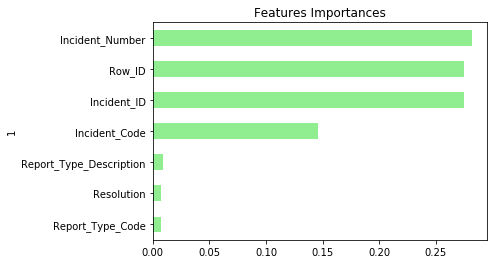

In [67]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)